## Forest Exploration in India: Chhattisgarh vs Madhya Pradesh

## Objective

The objectives of this Exploratory Data Analysis (EDA) of the dataset of India are:

1. Narrow down the exploration to 2 states: Chhattisgarh and Madhya Pradesh (both are adjacent to each other).
2. Why Chhattisgarh has more amount of forests and plantation of Paddy (~aka Rice) as compared to Madhya Pradesh?
3. Observe any climate, ecological, soil type differences between the two states.

Observe the position of the 2 states (Chhattisgarh and Madhya Pradesh in the map below).

<img src="https://www.kindpng.com/picc/m/490-4903357_thumb-image-india-map-29-states-name-hd.png" width="300" height="300" align="center">Image Source: https://www.kindpng.com/imgv/hwRxwob_thumb-image-india-map-29-states-name-hd/</img>


## Some Statistics

Some statistics before we start:

(2014-2015)

* **Forests in Chhattisgarh State**: 45.80% of the available land. [Source](https://fsi.nic.in/isfr19/vol2/isfr-2019-vol-ii-chhattisgarh.pdf)
* **Forests in Madhya Pradesh State**: 28.27% of the available land. [Source](https://fsi.nic.in/isfr19/vol2/isfr-2019-vol-ii-madhya-pradesh.pdf)


## Hypothesis

Before starting the EDA, I would like to make a hypothesis and assert if we were right or not:

_Note: I have lived in Chhattisgarh for more than 18 years, so have some background knowledge about it_

1. Chhattisgarh grows huge amount of rice because of the ample amount of rainfall it receives.
2. The community of Chhattisgarh has protected it's forest land, and hence the development hasn't been that active, as compared to Madhya Pradesh.
3. Chhattisgarh has one of the biggest waterfalls of India, which also contributes to it's tourism. Hence, forests have been protected more than ever.

**Necessary Imports**

Please refer to the README file of this repository to know the instructions on installations.

In [1]:
import geojson
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np

import os

## Datasets

We start-off with downloading the relevant datasets that we'll need. Here is a small gist of what we use, and why:

1. **Administrative Levels:** For visualizations and getting the area of particular forest type.
2. **Climate Zones:** To understand the climate in the forest area, and how it could impact our question: crop-growth and forest percentage.
3. **Soil Cover:** Plays a huge part in forest cover, crop-growth.
4. **Ecological Zones:** Understand the ecological zone of the 2 states in hand.

The final objective would be to _understand the difference_ between the 2 states, and do a survey of their soil, climate and ecological zones.

In [ ]:
# Downloading "Administrative Levels" dataset
!wget https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level2%20by%20Country/IND/IND_AL2_India.json

In [2]:
# Downloading "Administrative Levels" dataset
!wget https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level2%20by%20Country/IND/IND_AL2_India_GEZ.json

--2022-04-03 00:11:26--  https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level2%20by%20Country/IND/IND_AL2_India_GEZ.json
Resolving datasets.mojaglobal.workers.dev (datasets.mojaglobal.workers.dev)... 2606:4700:964e:1c93:df64:6:913:9af, 104.21.60.214, 172.67.201.202
Connecting to datasets.mojaglobal.workers.dev (datasets.mojaglobal.workers.dev)|2606:4700:964e:1c93:df64:6:913:9af|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25803457 (25M) [application/json]
Saving to: ‘IND_AL2_India_GEZ.json.4’

IND_AL2_India_GEZ.j 100%[===================>]  24.61M  26.2MB/s    in 0.9s    

2022-04-03 00:11:31 (26.2 MB/s) - ‘IND_AL2_India_GEZ.json.4’ saved [25803457/25803457]



In [3]:
# Downloading Climate Dataset
!wget https://datasets.mojaglobal.workers.dev/0:/Climate/IPCC_ClimateZoneMap_Vector.geojson

--2022-04-03 00:11:31--  https://datasets.mojaglobal.workers.dev/0:/Climate/IPCC_ClimateZoneMap_Vector.geojson
Resolving datasets.mojaglobal.workers.dev (datasets.mojaglobal.workers.dev)... 2606:4700:964e:1c93:df64:6:913:9af, 104.21.60.214, 172.67.201.202
Connecting to datasets.mojaglobal.workers.dev (datasets.mojaglobal.workers.dev)|2606:4700:964e:1c93:df64:6:913:9af|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13400448 (13M) [application/octet-stream]
Saving to: ‘IPCC_ClimateZoneMap_Vector.geojson.5’

IPCC_ClimateZoneMap 100%[===================>]  12.78M  18.2MB/s    in 0.7s    

2022-04-03 00:11:35 (18.2 MB/s) - ‘IPCC_ClimateZoneMap_Vector.geojson.5’ saved [13400448/13400448]



In [4]:
# Downloading Soil Dataset
!wget https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/World_Soil_Resources_wgs84.geojson

--2022-04-03 00:11:35--  https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/World_Soil_Resources_wgs84.geojson
Resolving datasets.mojaglobal.workers.dev (datasets.mojaglobal.workers.dev)... 2606:4700:964e:1c93:df64:6:913:9af, 104.21.60.214, 172.67.201.202
Connecting to datasets.mojaglobal.workers.dev (datasets.mojaglobal.workers.dev)|2606:4700:964e:1c93:df64:6:913:9af|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5757644 (5.5M) [application/octet-stream]
Saving to: ‘World_Soil_Resources_wgs84.geojson.4’

World_Soil_Resource 100%[===================>]   5.49M  9.51MB/s    in 0.6s    

2022-04-03 00:11:38 (9.51 MB/s) - ‘World_Soil_Resources_wgs84.geojson.4’ saved [5757644/5757644]



In [5]:
# Downloading Ecological Zones Dataset
!wget "https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/GlobalEcologicalZone_GEZFAO2010.json"

--2022-04-03 00:11:38--  https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/GlobalEcologicalZone_GEZFAO2010.json
Resolving datasets.mojaglobal.workers.dev (datasets.mojaglobal.workers.dev)... 2606:4700:964e:1c93:df64:6:913:9af, 172.67.201.202, 104.21.60.214
Connecting to datasets.mojaglobal.workers.dev (datasets.mojaglobal.workers.dev)|2606:4700:964e:1c93:df64:6:913:9af|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248873254 (237M) [application/json]
Saving to: ‘GlobalEcologicalZone_GEZFAO2010.json.4’

GlobalEcologicalZon 100%[===================>] 237.34M  49.4MB/s    in 5.3s    

2022-04-03 00:11:46 (44.6 MB/s) - ‘GlobalEcologicalZone_GEZFAO2010.json.4’ saved [248873254/248873254]



## Design of Dataset Class

To make things simpler, we start off with designing our `Dataset` class, to ensure the EDA looks clean and is easy to understand. The idea is to have a base class which does the task of loading the `.geojson`/`.json` files into a `GeoDataFrame` object. Any class that inherits this class, can implement a `process_dataset` method where they can write their clean-up/processing algorithm. Here is the format of our design:

```python
# Base class
class Dataset:
    # take path during initialization
    def __init__(self, path):
        # ...
        self.path = path
        self.df = None

    # Load the dataset into self.df
    def load_dataset(self):
        # ...
        return self.df
        
    def process_dataset(self, *args, **kwargs):
        # virtual method!!
        # ...

class ChildClass(Dataset):
    def process_dataset(self, *args, **kwargs):
        # Do processing here!
```

In [6]:
class Dataset:
    """
    Sample Dataset class which will load + process the dataset.
    
    Note that the process_dataset method is virtual, and needs to be implemented by child classes.
    """
    def __init__(self, path):
        self.path = path
        self.df = None

    def load_dataset(self):
        """
        Returns and saves the dataset after loading into a dataframe.
        
        Will raise an AssertionError if the path (passed during initialization) doesn't exist anymore.
        """
        # First ensure that the path exists!
        path = self.path
        assert os.path.exists(path), f"The given path: {path} does not exist."
        
        # Load the dataset into a GeoDataFrame
        self.df = gpd.read_file(path)
        
        print("Dataset loaded successfully with number of rows: ", len(self.df))
        return self.df

    def _get_index(self, ind):
        return self.df.iloc[ind]

    def __getitem__(self, index):
        assert self.df is not None, "Dataset has not been loaded yet. Please do obj.load_dataset()"
        return self._get_index(index)
    
    def process_dataset(self, *args, **kwargs):
        # virtual method, implement in the child class
        # df_base is common for all, as we will have to clip the dataframe always! (only for this EDA)
        raise NotImplementedError("This class needs to be implemented by the child class.")

In [7]:
class SoilClass(Dataset):
    def process_dataset(self, *args, **kwargs):
        df_base = kwargs.get("df_reference", None)
        if df_base is None:
            raise ValueError("Expected a df_reference= kwarg, but got none")
        output_df = self.df.clip(df_base)
        return output_df

In [8]:
class EcologicalClass(Dataset):
    def process_dataset(self, *args, **kwargs):
        df_base = kwargs.get("df_reference", None)
        if df_base is None:
            raise ValueError("Expected a df_reference= kwarg, but got none")
        output_df = self.df.clip(df_base)
        return output_df

In [9]:
class ClimateClass(Dataset):
    def process_dataset(self, *args, **kwargs):
        df_base = kwargs.get("df_reference", None)
        if df_base is None:
            raise ValueError("Expected a df_reference= kwarg, but got none")

        class_names_dict = {
            11: 'Tropical rainforest climate', 12: 'Tropical monsoon climate',
            10: 'Cool Temperature Moist', 0: 'Oceans', 1: 'Warm Temperature Moist',
            9: 'Tropical Montane'
        }

        # Map class names (encoded in numbers) to strings (meaningful)
        self.df.CLASS_NAME = self.df.CLASS_NAME.map(class_names_dict).fillna(self.df.CLASS_NAME)
        
        # Clip the dataframe to get our relevant dataset
        output_df = self.df.clip(df_base)
        return output_df

In [10]:
ds = Dataset("IND_AL2_India_GEZ.json")
ds_admin = Dataset("IND_AL2_India.json")
ds_climate = ClimateClass("IPCC_ClimateZoneMap_Vector.geojson")
ds_soil = SoilClass("World_Soil_Resources_wgs84.geojson")
ds_ecological_zone = EcologicalClass("GlobalEcologicalZone_GEZFAO2010.json")

In [11]:
df_in = ds.load_dataset()
df_admin_in = ds_admin.load_dataset()
df_climate_in = ds_climate.load_dataset()
df_soil_in = ds_soil.load_dataset()
df_eco_in = ds_ecological_zone.load_dataset()

Dataset loaded successfully with number of rows:  9
Dataset loaded successfully with number of rows:  1
Dataset loaded successfully with number of rows:  26165
Dataset loaded successfully with number of rows:  33
Dataset loaded successfully with number of rows:  16


## Category of Forests in India

The following categories of forests exist in India:

```python
>>> df_in['gez_name']
0    Subtropical mountain system
1             Subtropical steppe
2      Temperate mountain system
3                Tropical desert
4            Tropical dry forest
5          Tropical moist forest
6       Tropical mountain system
7            Tropical rainforest
8             Tropical shrubland
```

We'll be choosing Tropical Dry Forest, but why? Here are some reasons:

1. I lived in Chhattisgarh (one of the states under comparison here) for ~19 years. I can relate more.
2. Studied in one of the dry states of India (Rajasthan) for almost 2 years.
3. Both Madhya Pradesh and Chhattisgarh has this type of forest in prominence.
4. They are AKA "monsoon forest". Aren't monsoons fun?


In [12]:
# Get the tropical dry forest data from the dataframe
df_tropical_dry_forest = df_in[df_in['gez_name'] == 'Tropical dry forest']

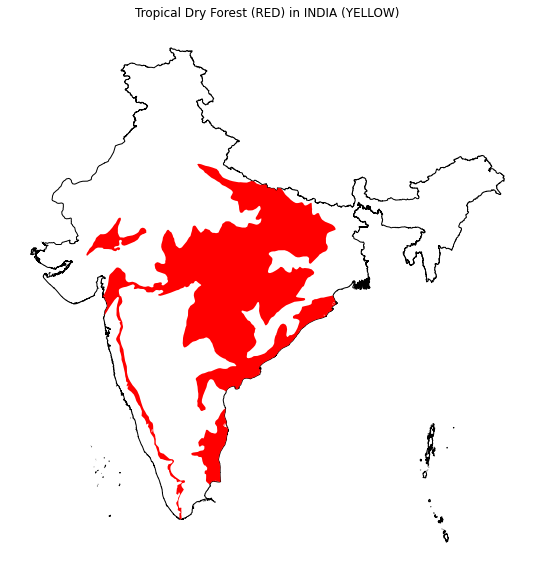

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10));
df_admin_in.plot(ax=ax, color='none')
ax.set_title("Tropical Dry Forest (RED) in INDIA")
df_tropical_dry_forest.plot(ax=ax, color='red')
plt.axis('off')
plt.show()

## Distributing based on Ecological Conditions, Climate Zones and Soil Map

The states in the map which correspond to Tropical Dry Forest are:

1. Chhattisgarh
2. Madhya Pradesh
3. Some parts of Odisha
4. Some parts of Chennai
5. Western Coast
6. Some parts of Gujarat and Rajasthan
7. Bihar
8. Uttar Pradesh

## Climate Zones

We'll start off with classifying based on the climate zones. Let's try to figure out where does Madhya Pradesh and Chhattisgarh Stand.

In [14]:
output_climate = ds_climate.process_dataset(df_reference=df_tropical_dry_forest)

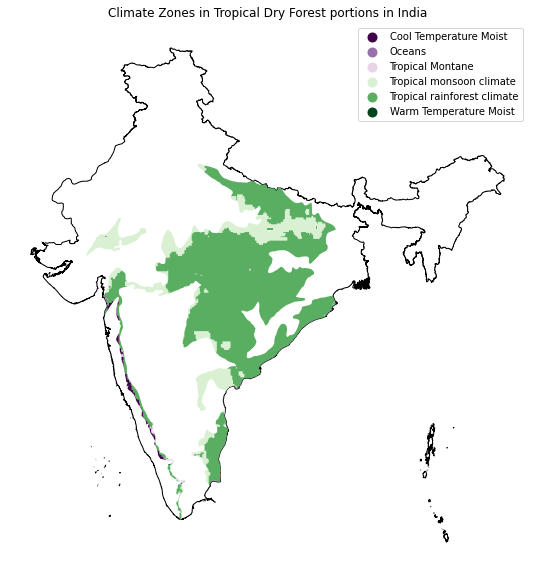

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10));
df_admin_in.plot(ax=ax, color='none', legend=True)
ax.set_title("Climate Zones in Tropical Dry Forest portions in India")
output_climate.plot(ax=ax, column='CLASS_NAME', cmap="PRGn", legend=True)
plt.axis('off')
plt.show()

### Analysis:

As it's clear from the figure above, the area around "Chhattisgarh", "Madhya Pradesh and Eastern Coast" is of category "Tropical Rainforest Climate".

Since most of the Madhya Pradesh and Chhattisgarh have same climate zones, this points that climate wouldn't have huge impact in the difference of forestation and crops-growth.

## Soil Cover

Next comes soil cover, which also reflects on the climate. This is one of the huge factors of the type of forests, amount of forests as well as crop growths (and type of crops).

In [16]:
output_soil = ds_soil.process_dataset(df_reference=df_tropical_dry_forest)

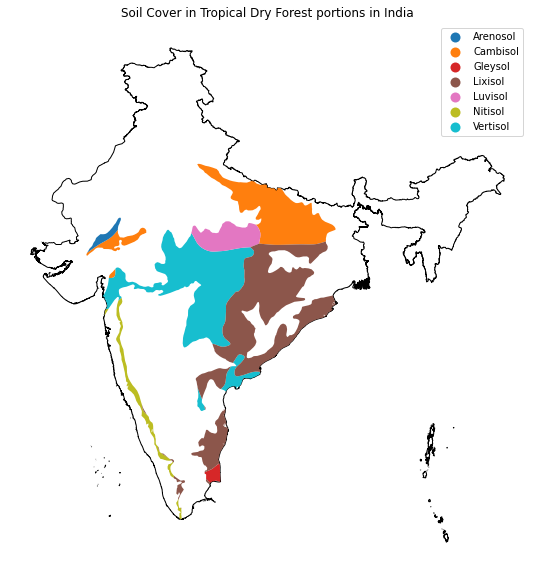

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10));
df_admin_in.plot(ax=ax, color='none', legend=True)
ax.set_title("Soil Cover in Tropical Dry Forest portions in India")
output_soil.plot(ax=ax, column='IPCC', legend=True)
plt.axis('off')
plt.show()

**Analysis**:

From the above plot, it's clear that soil cover/type is different between the 2 states. **Chhattisgarh has Lixisol, while Madhya Pradesh has Vertisol.**

From [this](https://www.britannica.com/science/Lixisol) link on Lixisol:

> Their age and mineralogy have led to low levels of plant nutrients and a high erodibility, making agriculture possible only with frequent fertilizer applications, minimum tillage, and careful erosion control

High erodibility is a consequence of either high rain or high storms. Chhattisgarh has high rain, and for this reason, Lixisol is prominent in that area.

## Ecological Zones

Let's study the ecological zones for the area we selected before.

In [18]:
output_eco = ds_ecological_zone.process_dataset(df_reference=df_tropical_dry_forest)

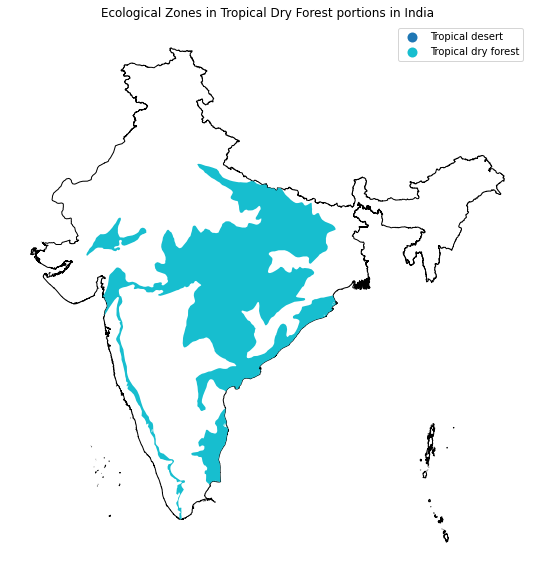

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10));
df_admin_in.plot(ax=ax, color='none', legend=True)
ax.set_title("Ecological Zones in Tropical Dry Forest portions in India")
output_eco.plot(ax=ax, column='gez_name', legend=True)
plt.axis('off')
plt.show()

**Analysis**

From the figure above, looks like Madhya Pradesh and Chhattisgarh both come in the same Ecological Zones. So this can not be a reason of the difference.

## Final Analysis

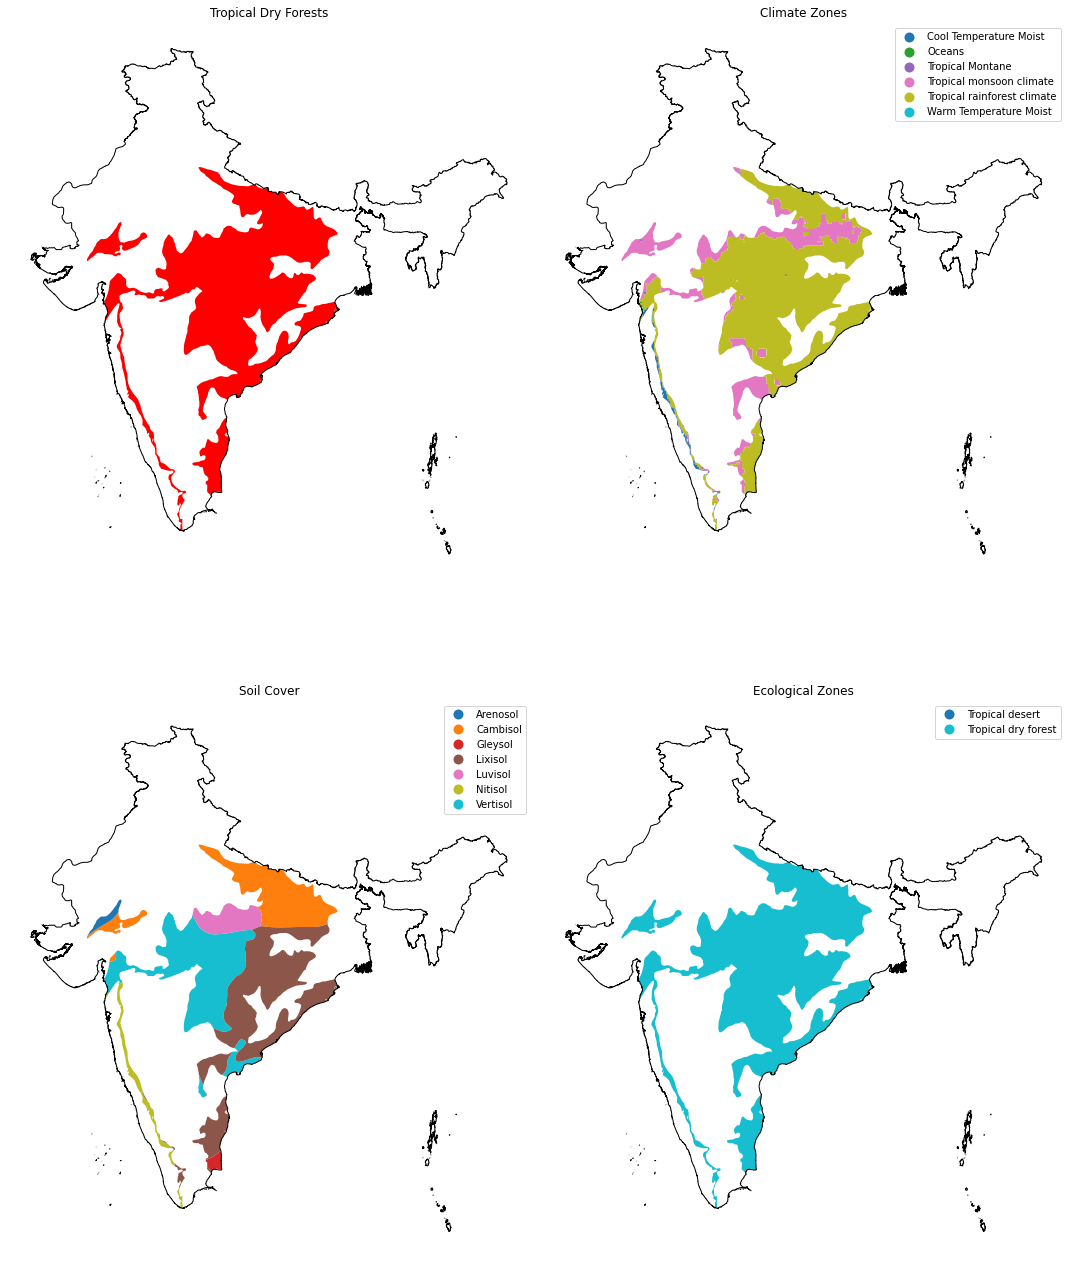

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(15, 20))
df_tropical_dry_forest.plot(ax=ax[0][0], color='red')
output_climate.plot(ax=ax[0][1], column='CLASS_NAME', legend=True)
output_soil.plot(ax=ax[1][0], column='IPCC', legend=True)
output_eco.plot(ax=ax[1][1], column='gez_name', legend=True)

ax[0][0].set_title("Tropical Dry Forests")
ax[0][1].set_title("Climate Zones")
ax[1][0].set_title("Soil Cover")
ax[1][1].set_title("Ecological Zones")

for i in range(2):
    for j in range(2):
        df_admin_in.plot(figsize=(20, 10), color='none', ax=ax[i][j])
        ax[i][j].axis('off')

plt.tight_layout()
plt.show()

# Looking at all the above figures, we can observe how mostly the soil cover varies between the 2 states we chose.

- This is one of the reasons why the crop-growth of Rice in Chhattisgarh is way higher than in Madhya Pradesh.
- The forestation growth in Chhattisgarh, however, is mostly because of the political and reasons limited to the society and growth.

This does match our hypothesis, partially though! :)

Madhya Pradesh is the home to very popular and established institutes in the country, along with it's growth. However, Chhattisgarh is more close to the nature but also slowly growing in terms of development and infrastructure.